In [ ]:
#Feature Engineering Demo with Diamonds Dataset

In [1]:
import numpy as np
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the CSV file into pandas dataframe
dia = pd.read_csv("05_Diamonds.csv")  

In [4]:
# Check top few records to get a feel of the data structure
dia.head(7)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [5]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
dia.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Text(0, 0.5, 'Price')

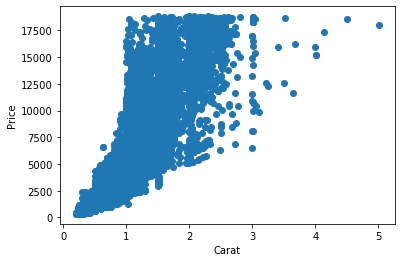

In [7]:
plt.scatter(dia.carat, dia.price, )
plt.xlabel('Carat')
plt.ylabel('Price')

Text(0, 0.5, 'Log Price')

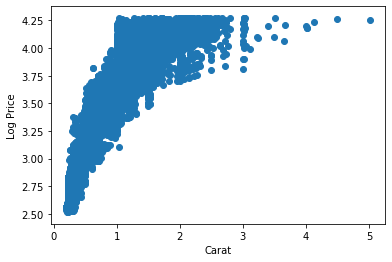

In [8]:
dia['logPrice']=np.log10(dia['price'])
plt.scatter(dia.carat, dia.logPrice, )
plt.xlabel('Carat')
plt.ylabel('Log Price')


In [9]:
x = dia[['carat']]
y = dia['price']

In [10]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [11]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Train R^2
print(regression_model.score(x_train, y_train))

0.8493164852062774


In [13]:
# Test R^2
print(regression_model.score(x_test, y_test))

0.8493196667739158


In [14]:
# Train MSE
predictedPrice = regression_model.predict(x_train)
print(mean_squared_error(predictedPrice, y_train))

2435246.6832437012


In [15]:
# Test MSE
predictedPrice = regression_model.predict(x_test)
print(mean_squared_error(predictedPrice, y_test))

2311408.505558712


In [16]:
x = dia[['carat']]
y = dia['logPrice']

In [17]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [18]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Train R^2
print(regression_model.score(x_train, y_train))

0.8448789655221723


In [20]:
# Test R^2
print(regression_model.score(x_test, y_test))

0.8512992539867699


In [21]:
# Train MSE
predictedPrice = regression_model.predict(x_train)
print(mean_squared_error(predictedPrice, y_train))

0.030409698141313155


In [22]:
# Test MSE
predictedPrice = regression_model.predict(x_test)
print(mean_squared_error(predictedPrice, y_test))

0.028226766920597692


Text(0, 0.5, 'Log Price')

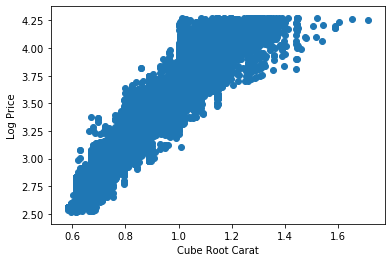

In [23]:
dia['cbrtCarat']=np.cbrt(dia['carat'])

plt.scatter(dia.cbrtCarat, dia.logPrice, )
plt.xlabel('Cube Root Carat')
plt.ylabel('Log Price')

In [24]:
x = dia[['cbrtCarat']]
y = dia['logPrice']

In [25]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [26]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Train R^2
print(regression_model.score(x_train, y_train))

0.9231921095763808


In [28]:
# Test R^2
print(regression_model.score(x_test, y_test))

0.9245630695086475


In [29]:
# Train MSE
predictedPrice = regression_model.predict(x_train)
print(mean_squared_error(predictedPrice, y_train))

0.01505730522308485


In [30]:
## Building a full model

In [31]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
logPrice      53940 non-null float64
cbrtCarat     53940 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 5.4+ MB


In [32]:
diafull = pd.get_dummies(dia, prefix_sep='_', drop_first=True)

In [33]:
diafull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
Unnamed: 0       53940 non-null int64
carat            53940 non-null float64
depth            53940 non-null float64
table            53940 non-null float64
price            53940 non-null int64
x                53940 non-null float64
y                53940 non-null float64
z                53940 non-null float64
logPrice         53940 non-null float64
cbrtCarat        53940 non-null float64
cut_Good         53940 non-null uint8
cut_Ideal        53940 non-null uint8
cut_Premium      53940 non-null uint8
cut_Very Good    53940 non-null uint8
color_E          53940 non-null uint8
color_F          53940 non-null uint8
color_G          53940 non-null uint8
color_H          53940 non-null uint8
color_I          53940 non-null uint8
color_J          53940 non-null uint8
clarity_IF       53940 non-null uint8
clarity_SI1      53940 non-null uint8
clarity_SI2      53940 non-null uint8
c

In [34]:
x = diafull.drop(['cbrtCarat','logPrice',"Unnamed: 0",'price'], axis=1)

In [35]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 23 columns):
carat            53940 non-null float64
depth            53940 non-null float64
table            53940 non-null float64
x                53940 non-null float64
y                53940 non-null float64
z                53940 non-null float64
cut_Good         53940 non-null uint8
cut_Ideal        53940 non-null uint8
cut_Premium      53940 non-null uint8
cut_Very Good    53940 non-null uint8
color_E          53940 non-null uint8
color_F          53940 non-null uint8
color_G          53940 non-null uint8
color_H          53940 non-null uint8
color_I          53940 non-null uint8
color_J          53940 non-null uint8
clarity_IF       53940 non-null uint8
clarity_SI1      53940 non-null uint8
clarity_SI2      53940 non-null uint8
clarity_VS1      53940 non-null uint8
clarity_VS2      53940 non-null uint8
clarity_VVS1     53940 non-null uint8
clarity_VVS2     53940 non-null uint8
dtype

In [36]:
y = diafull['price']

In [37]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [38]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(regression_model.score(x_train, y_train))

0.9189349877290273


In [40]:
# Import linear models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Create lasso and ridge objects
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
# Fit the models
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)
# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(x_train, y_train))
print("ridge score:",ridge.score(x_train, y_train))
print("lasso MSE:", mean_squared_error(y_test, lasso.predict(x_test)))
print("ridge MSE:", mean_squared_error(y_test, ridge.predict(x_test)))
print("lasso coef:", lasso.coef_)
print("ridge coef:", ridge.coef_)

lasso score: 0.9186375659775474
ridge score: 0.9189310567756604
lasso MSE: 1202743.173687309
ridge MSE: 1200683.1938702979
lasso coef: [10876.14754394   -64.63626148   -28.72360998  -882.73050571
    -0.            -0.           495.01807379   745.76944488
   674.52933797   651.84010737  -164.93893856  -216.22345934
  -434.29804582  -932.4582272  -1389.42700402 -2299.31647775
  4905.83180714  3212.96849254  2271.2312362   4134.46458369
  3818.29433167  4562.51244904  4497.09512778]
ridge coef: [ 1.10155324e+04 -5.81697305e+01 -2.55734449e+01 -9.18961500e+02
 -1.52963897e-01 -1.76838626e+01  6.04251378e+02  8.52879709e+02
  7.81094937e+02  7.54669513e+02 -2.17443837e+02 -2.68117652e+02
 -4.89841011e+02 -9.89294696e+02 -1.45587206e+03 -2.37705039e+03
  5.40081471e+03  3.67364499e+03  2.72786894e+03  4.60456823e+03
  4.28163748e+03  5.04138057e+03  4.96982670e+03]


C:\Users\IT\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
C:\Users\IT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\IT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24733732409.072613, tolerance: 61021966.7305944
  positive)


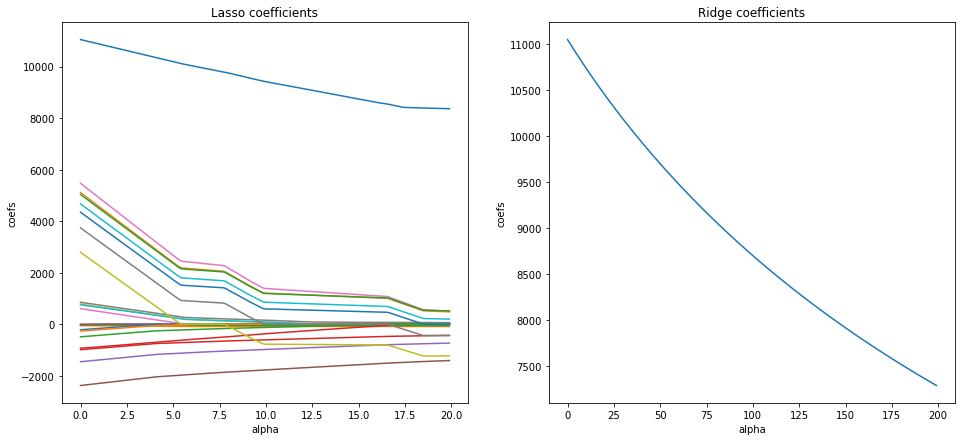

In [41]:
# Import library for visualization
import matplotlib.pyplot as plt
coefsLasso = []
coefsRidge = []
# Build Ridge and Lasso for 200 values of alpha and write the coefficients into array
alphasLasso = np.arange (0, 20, 0.1)
alphasRidge = np.arange (0, 200, 1)
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(x_train, y_train)
    coefsLasso.append(lasso.coef_)
    ridge = linear_model.Ridge(alpha=alphasRidge[i])
    ridge.fit(x_train, y_train)
    coefsRidge.append(ridge.coef_[0])

# Build Lasso and Ridge coefficient plots
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.subplot(122)
plt.plot(alphasRidge, coefsRidge)
plt.title('Ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()